In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import random
import trace_gen as tg
import seaborn as sns

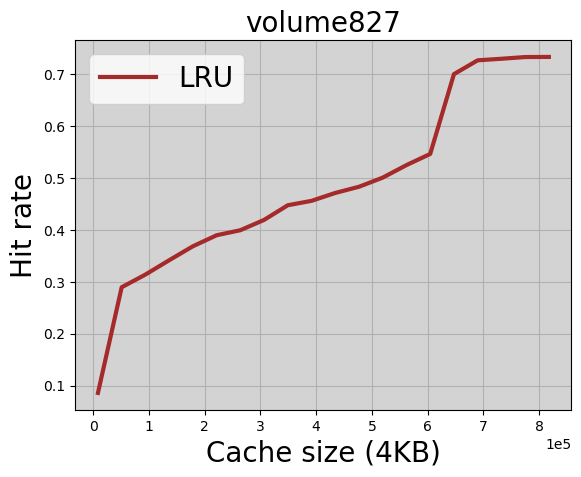

In [7]:
hr_v827 = np.loadtxt('/home/yirongwn/data/LRU/v827_lru_hr.txt')
c_v827 = np.loadtxt('/home/yirongwn/data/LRU/v827_c.txt')
hr_v827 = np.array(hr_v827)
mr_v827 = hr_v827

plt.plot(c_v827, mr_v827, '-', label='LRU', linewidth=3, color='brown')
plt.xlabel('Cache size (4KB)', fontsize=20)
plt.ylabel('Hit rate', fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.gca().set_facecolor('lightgrey')
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.title(f'volume827', fontsize=20)

plt.show()

In [21]:
def mrc_compute(trace):
    M = len(set(trace))
    K = M // 20
    c = np.arange(1, M, K)
    hr_lru = [tg.sim_lru(int(_c), trace, raw=True) for _c in c]
    return c, hr_lru

def mae(hr1, hr2):
    return np.mean(np.abs(hr1 - hr2))
def norm(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

def plot_mrcs(title, cs, lrus, names, location='lower right'):
    cs_normalized = [c / c.max() for c in cs]
    palette = sns.color_palette("dark", len(cs))
    fig, ax = plt.subplots(figsize=(10, 6))  # Optional: set a specific figure size
    ax.grid(True)
    for i in range(len(cs)):
        linestyle = '-' if i == 0 else '--'
        # marker = '+' if i % 3 == 0 else ''
        ax.plot(
            cs_normalized[i],  # Scale normalized values to original range
            lrus[i], 
            linestyle, 
            label=names[i], 
            linewidth=5 if i == len(cs) - 1 else 4, 
            color=palette[i], 
            alpha=0.8 if i != len(cs) - 1 else 1.0
        )
    
    ax.set_title(title, fontsize=24)
    ax.set_xlabel('Normalized Cache Size (C)', fontsize=24)
    ax.set_ylabel('Hit Rate', fontsize=24)
    ax.legend(loc=location, fontsize=24, frameon=False)
    ax.set_title(title, fontsize=24)
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
    ax.xaxis.get_major_formatter().set_scientific(True)
    ax.xaxis.get_major_formatter().set_powerlimits((-1, 1))
    ax.tick_params(axis='both', labelsize=16)
    plt.tight_layout()
    plt.show()

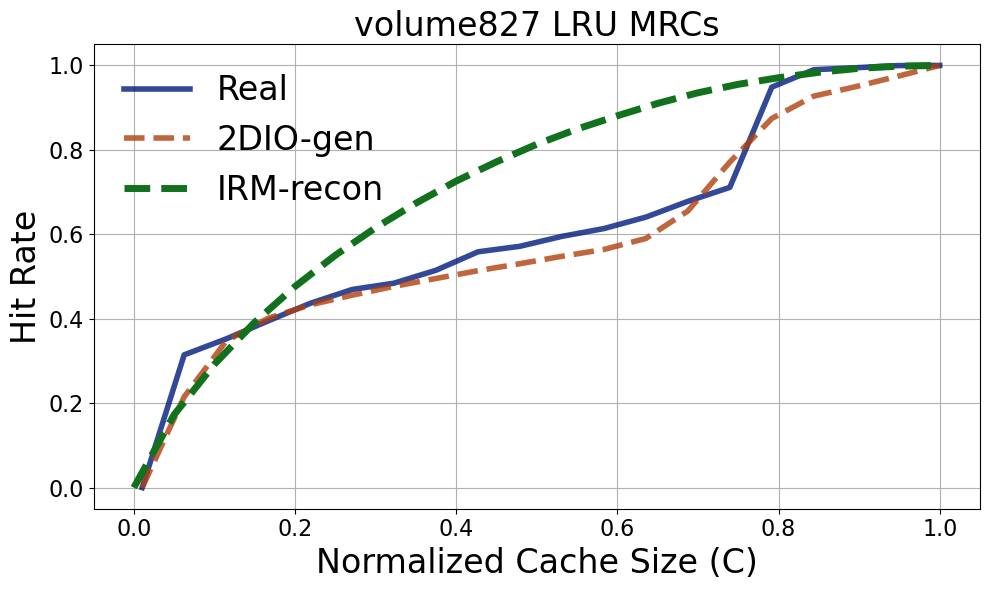

In [22]:
hr_v827 = np.loadtxt('/home/yirongwn/data/LRU/v827_lru_hr.txt', dtype=np.float32)
c_v827 = np.loadtxt('/home/yirongwn/data/LRU/v827_c.txt', dtype=np.int32)
g827 = tg.TraceGenerator(100, 10000)
pdf827 = tg.fgen(60, np.array([0,13]), 5e-3)
t827 = g827.gen_from_pdf(pdf827, 0.2)
cs827, hrs827 = mrc_compute(t827)
t_irm827 = np.loadtxt('/home/yirongwn/data/recon/v867_irm_recon_trace.txt', dtype=np.float32)
cs_irm827, hrs_irm827 = mrc_compute(t_irm827)
plot_mrcs('volume827 LRU MRCs',[c_v827, cs827, cs_irm827], [norm(hr_v827), norm(hrs827), norm(hrs_irm827)], ['Real', '2DIO-gen', 'IRM-recon'
], 'upper left')

In [4]:
# FIO traces:
def mrc(parda_trace):
    trace = parda_trace
    M = len(set(trace))
    K = M // 100
    c = np.arange(1, M, K)
    hr_lru = [tg.sim_lru(_c, trace, raw=True) for _c in c]
    return c, hr_lru

In [5]:
t1 = np.loadtxt('../traces/log-zipf1.2-2column.txt', dtype=np.int32)
t1[:,0] += 4095
t1 = tg.squash(tg.unroll(t1 // 4096))
c1, hr_lru1 = mrc(t1)
# %%
ird1 = tg.iad(t1)
ird1 = ird1[ird1 > -1]

t2 = np.loadtxt('../traces/log-paretoRand-2column.txt', dtype=np.int32)
t2[:,0] += 4095
t2 = tg.squash(tg.unroll(t2 // 4096))
# %%
c2, hr_lru2 = mrc(t2)
ird2 = tg.iad(t2)
ird2 = ird2[ird2 > -1]
# %%
t3 = np.loadtxt('../traces/log-zonedMix-2column.txt', dtype=np.int32)
t3[:,0] += 4095
t3 = tg.squash(tg.unroll(t3 // 4096))
# %%
c3, hr_lru3 = mrc(t3)
ird3 = tg.iad(t3)
ird3 = ird3[ird3 > -1]
# %%
t4 = np.loadtxt('../traces/log-uniform-2column.txt', dtype=np.int32)
t4[:,0] += 4095
t4 = tg.squash(tg.unroll(t4 // 4096))
# %%
c4, hr_lru4 = mrc(t4)
ird4 = tg.iad(t4)
ird4 = ird4[ird4 > -1]
# %%
# %%
t5 = np.loadtxt('../traces/log-normal-2column.txt', dtype=np.int32)
t5[:,0] += 4095
t5 = tg.squash(tg.unroll(t5 // 4096))
# %%
c5, hr_lru5 = mrc(t5)
ird5 = tg.iad(t5)
ird5 = ird5[ird5 > -1]

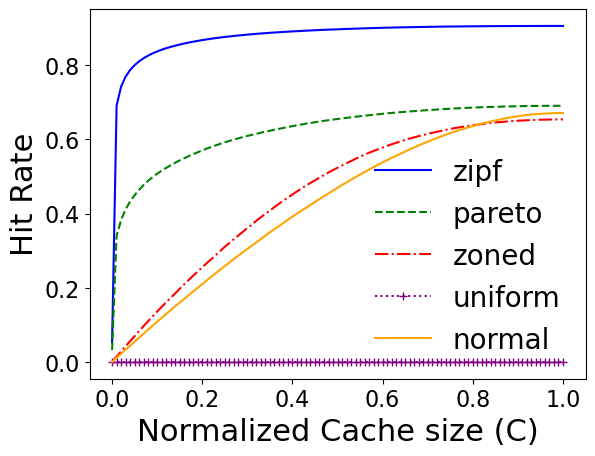

In [23]:
c1_norm = [x / max(c1) for x in c1]
c2_norm = [x / max(c2) for x in c2]
c3_norm = [x / max(c3) for x in c3]
c4_norm = [x / max(c4) for x in c4]
c5_norm = [x / max(c5) for x in c5]

plt.plot(c1_norm, hr_lru1, linestyle='-', color='blue', label='zipf')
plt.plot(c2_norm, hr_lru2, linestyle='--', color='green', label='pareto')
plt.plot(c3_norm, hr_lru3, linestyle='-.', color='red', label='zoned')
plt.plot(c4_norm, hr_lru4, linestyle=':', marker='+', color='purple', label='uniform')
plt.plot(c5_norm, hr_lru5, linestyle='-', color='orange', label='normal')

plt.xlabel('Normalized Cache size (C)', fontsize=22)
plt.ylabel('Hit Rate', fontsize=22)
# plt.title('MRCs under IRM')
plt.legend(fontsize=20, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

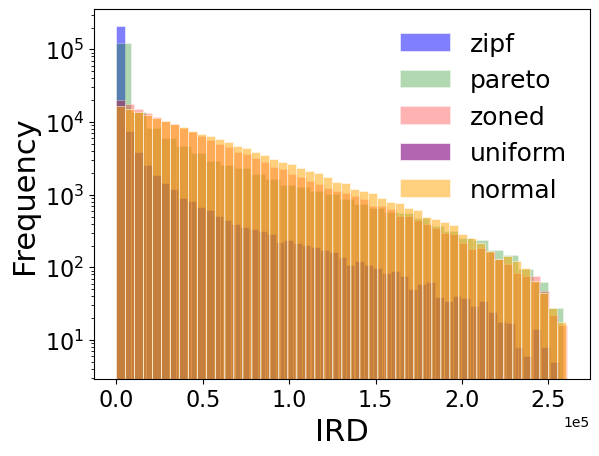

In [28]:
plt.hist(ird1, bins=50, color='blue', alpha=0.5, label='zipf', log=True, edgecolor='white', linewidth=0.7)
plt.hist(ird2, bins=30, color='green', alpha=0.3, label='pareto', log=True, edgecolor='white', linewidth=0.7)
plt.hist(ird3, bins=50, color='red', alpha=0.3, label='zoned', log=True, edgecolor='white', linewidth=0.7)
plt.hist(ird4, bins=30, color='purple', alpha=0.6, label='uniform', log=True, edgecolor='white', linewidth=0.7)
plt.hist(ird5, bins=50, color='orange', alpha=0.5, label='normal', log=True, edgecolor='white', linewidth=0.7)
# plt.hist(ird6, bins=30, color='grey', alpha=0.5, label='sequential', log=True, edgecolor='white', linewidth=0.7)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
# plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# Set labels and legend
plt.xlabel('IRD', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
# plt.title('IRDs under IRM')
plt.legend(fontsize=18, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [15]:
c_49 = np.loadtxt('../data/LRU/w49_c.txt', dtype=np.int32)
hr_49 = np.loadtxt('../data/LRU/w49_lru_hr.txt', dtype=np.float32)
ird_49 = np.loadtxt('../data/LRU/w49_irds.txt', dtype=np.int32)

c_43 = np.loadtxt('../data/LRU/w43_c.txt', dtype=np.int32)
hr_43 = np.loadtxt('../data/LRU/w43_lru_hr.txt', dtype=np.float32)
ird_43 = np.loadtxt('../data/LRU/w43_irds.txt', dtype=np.int32)

c_62 = np.loadtxt('../data/LRU/w62_c.txt', dtype=np.int32)
hr_62 = np.loadtxt('../data/LRU/w62_lru_hr.txt', dtype=np.float32)
ird_62 = np.loadtxt('../data/LRU/w62_irds.txt', dtype=np.int32)

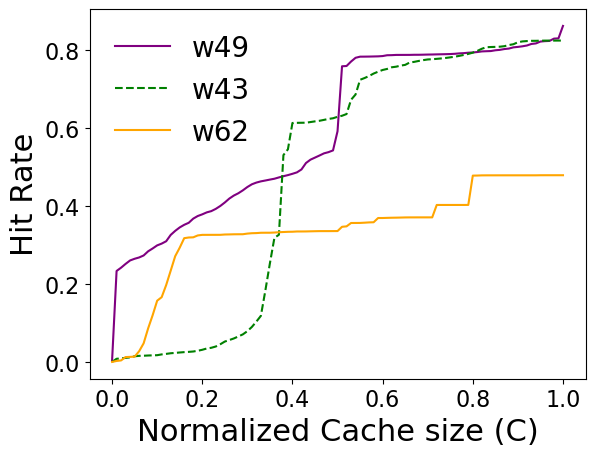

In [25]:
c_49_norm = [x / max(c_49) for x in c_49]
c_43_norm = [x / max(c_43) for x in c_43]
c_62_norm = [x / max(c_62) for x in c_62]
# %%
# Plotting with different line styles and colors
plt.plot(c_49_norm, hr_49, linestyle='-', color='purple', label='w49')
plt.plot(c_43_norm, hr_43, linestyle='--', color='green', label='w43')
plt.plot(c_62_norm, hr_62, linestyle='-', color='orange', label='w62')
plt.xlabel('Normalized Cache size (C)', fontsize=22)
plt.ylabel('Hit Rate', fontsize=22)
plt.legend(fontsize=20, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

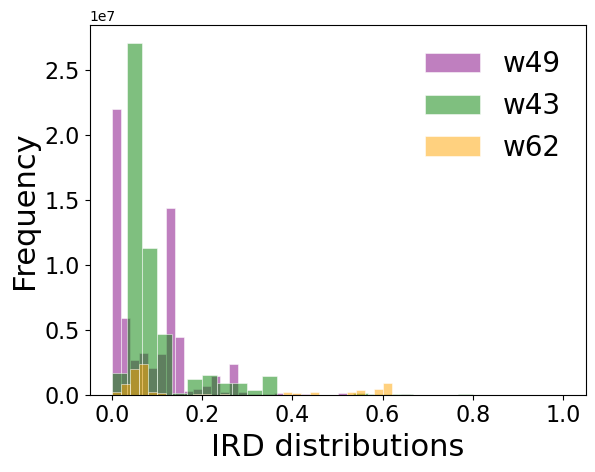

In [29]:
ird_43 = np.array(ird_43)
ird_49 = np.array(ird_49)
ird_62 = np.array(ird_62)
ird_43_norm = ird_43 / np.max(ird_43)
ird_49_norm = ird_49 / np.max(ird_49)
ird_62_norm = ird_62 / np.max(ird_62)

# %%
plt.hist(ird_49_norm, bins=50, color='purple', alpha=0.5, label='w49', log=True, edgecolor='white', linewidth=0.7)
plt.hist(ird_43_norm, bins=30, color='green', alpha=0.5, label='w43', log=True, edgecolor='white', linewidth=0.7)
plt.hist(ird_62_norm, bins=50, color='orange', alpha=0.5, label='w62', log=True, edgecolor='white', linewidth=0.7)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.xlabel('IRD distributions', fontsize=22)
plt.ylabel('Frequency', fontsize=22)
plt.legend(fontsize=20, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

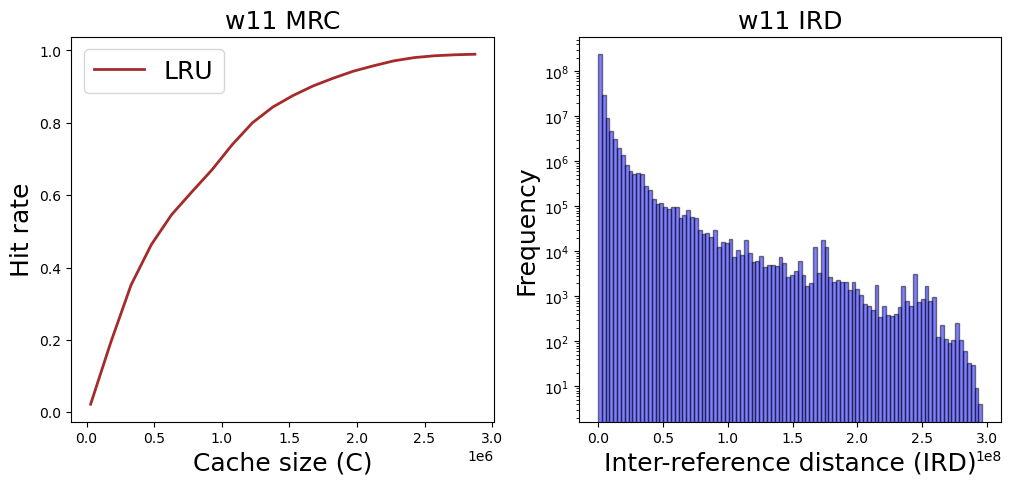

In [6]:
w11_c = np.loadtxt('/home/yirongwn/data/LRU/w11_c.txt', dtype=np.int32)
w11_hr_lru = np.loadtxt('/home/yirongwn/data/LRU/w11_lru_hr.txt', dtype=np.float32)
w11_irds = np.loadtxt('/home/yirongwn/data/LRU/w11_irds.txt', dtype=np.int32)

In [3]:
def mrc_ird_compute(name, trace):
    c = np.loadtxt(f'/home/yirongwn/data/LRU/{name}_c.txt', dtype=np.int32)
    hr_lru = np.loadtxt(f'/home/yirongwn/data/LRU/{name}_lru_hr.txt', dtype=np.float32)

    # Compute hit rates for LRU
    # hr_lru = [tg.sim_lru(_c, trace, raw=True) for _c in c]

    # Compute IRDs (including -1 values)
    irds = tg.iad(trace)

    # Save results (both the hit rates and the IRDs)
    # np.savetxt(f'/home/yirongwn/data/LRU/{name}_lru_hr.txt', hr_lru, fmt='%f')
    # np.savetxt(f'/home/yirongwn/data/LRU/{name}_c.txt', c, fmt='%d')
    np.savetxt(f'/home/yirongwn/data/LRU/{name}_irds.txt', irds, fmt='%d')

    return c, hr_lru, irds


def mrc_ird_plot(name, c, hr_lru, irds, pos=-0.5):
    # Separate IRDs into regular and -1 values
    valid_irds = irds[irds > -1]
    num_invalid_irds = len(irds[irds == -1])
    max_ird = max(valid_irds)
    # Plot MRC
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns
    axs[0].plot(c, hr_lru, '-', label='LRU', linewidth=2, color='brown')
    axs[0].set_xlabel('Cache size (C)', fontsize=20)
    axs[0].set_ylabel('Hit rate', fontsize=20)
    axs[0].legend(fontsize=20)
    axs[0].set_title(f'{name} MRC', fontsize=20)
    axs[0].xaxis.set_major_formatter(ticker.ScalarFormatter())
    axs[0].xaxis.get_major_formatter().set_scientific(True)
    axs[0].xaxis.get_major_formatter().set_powerlimits((-1, 1))

    # Plot IRD histogram (log scale)
    axs[1].hist(valid_irds, bins=100, log=True, alpha=0.5, color='blue', edgecolor='black')

    # Add a bar for the -1 IRDs
    inf_bar_x = max(valid_irds) * 1.1  # x-position of the bar for IRD = -1
    axs[1].bar(inf_bar_x, num_invalid_irds, width=max_ird * 0.025, color='red')

    axs[1].set_ylim(bottom=1e-1)  # Ensure the bottom is low enough for visibility
    axs[1].set_xlim(left=max_ird//10, right=max_ird*1.15)  # Ensure the right is far enough for visibility

    # Get current ticks
    ticks = axs[1].get_xticks()

    # Filter ticks to keep only those <= max(valid_irds)
    filtered_ticks = [tick for tick in ticks if tick <= max_ird]

    # Set custom ticks
    axs[1].set_xticks(filtered_ticks)
    axs[1].set_xticklabels([f'{int(tick)}' for tick in filtered_ticks])

    # Annotate the x-axis with the infinity symbol at the x position of the red bar
    axs[1].annotate(r'$\infty$', xy=(inf_bar_x, 1e-1), xycoords='data', 
                    xytext=(0, pos), textcoords='offset points', 
                    ha='center', va='top', fontsize=20, color='red')

    # Formatting IRD plot
    axs[1].set_xlabel('Inter-reference distance (IRD)', fontsize=20)
    axs[1].set_ylabel('Frequency', fontsize=20)
    axs[1].set_title(f'{name} IRD', fontsize=20)

    # Set scientific notation for both x and y axes
    axs[1].xaxis.set_major_formatter(ticker.ScalarFormatter())
    axs[1].xaxis.get_major_formatter().set_scientific(True)
    axs[1].xaxis.get_major_formatter().set_powerlimits((-1, 1))
    axs[1].yaxis.set_major_formatter(ticker.ScalarFormatter())
    axs[1].yaxis.get_major_formatter().set_scientific(True)
    axs[1].yaxis.get_major_formatter().set_powerlimits((-1, 1))

    plt.tight_layout()
    plt.show()




In [96]:
w11 = np.loadtxt('/opt/traces/w11_r.txt', dtype=np.int32)
w11[:, 0] += 7
w11 = tg.squash(tg.unroll(w11 // 8))
w11_c, w11_hr_lru, w11_irds = mrc_ird_compute('w11', w11)


KeyboardInterrupt: 

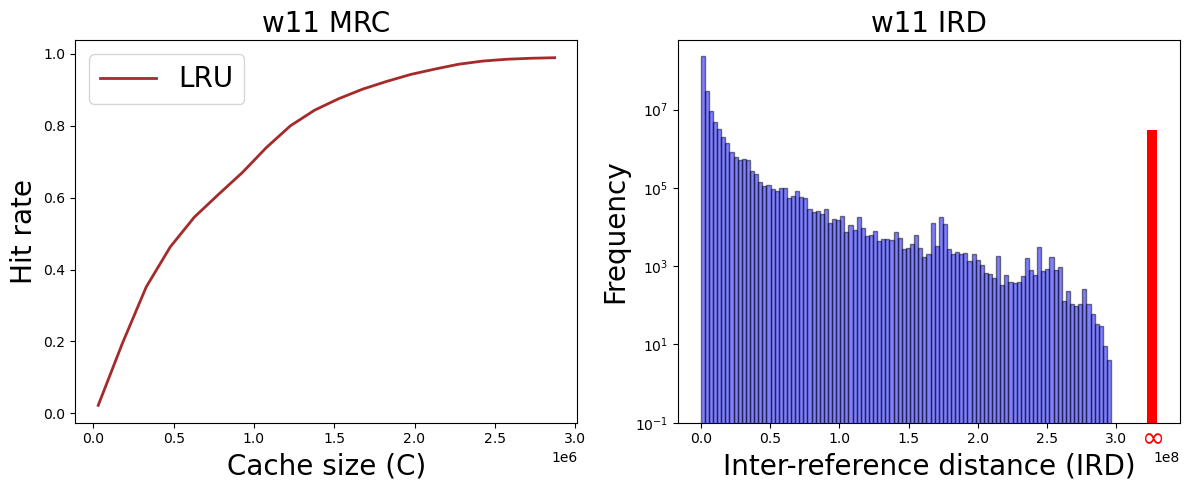

In [66]:
mrc_ird_plot('w11', w11_c, w11_hr_lru, w11_irds, -0.5)

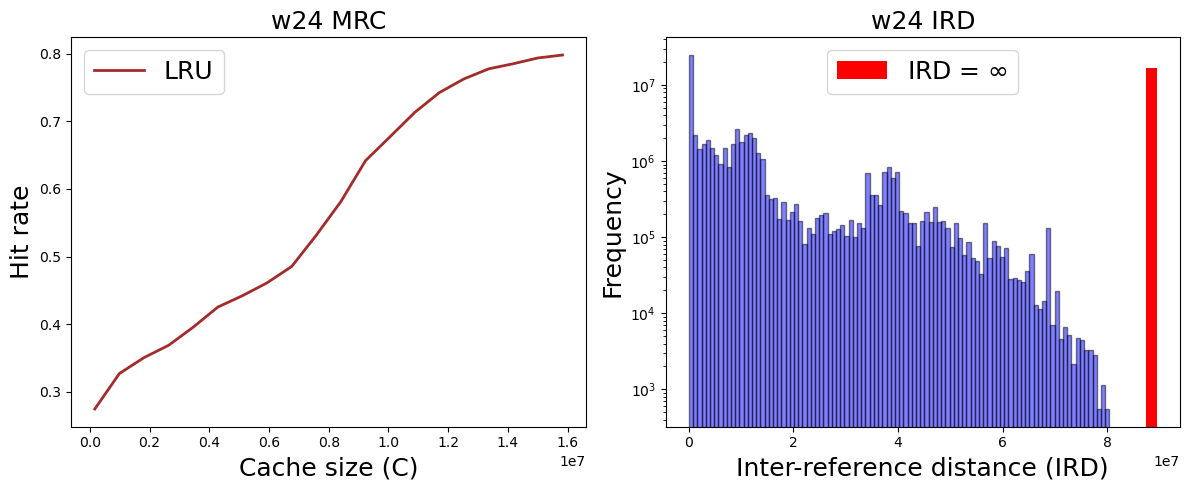

In [29]:
w24 = np.loadtxt('/opt/traces/w24_r.txt', dtype=np.int32)
w24[:, 0] += 7
w24 = tg.squash(tg.unroll(w24 // 8))
c, hr_lru, irds = mrc_ird_compute('w24', w24)


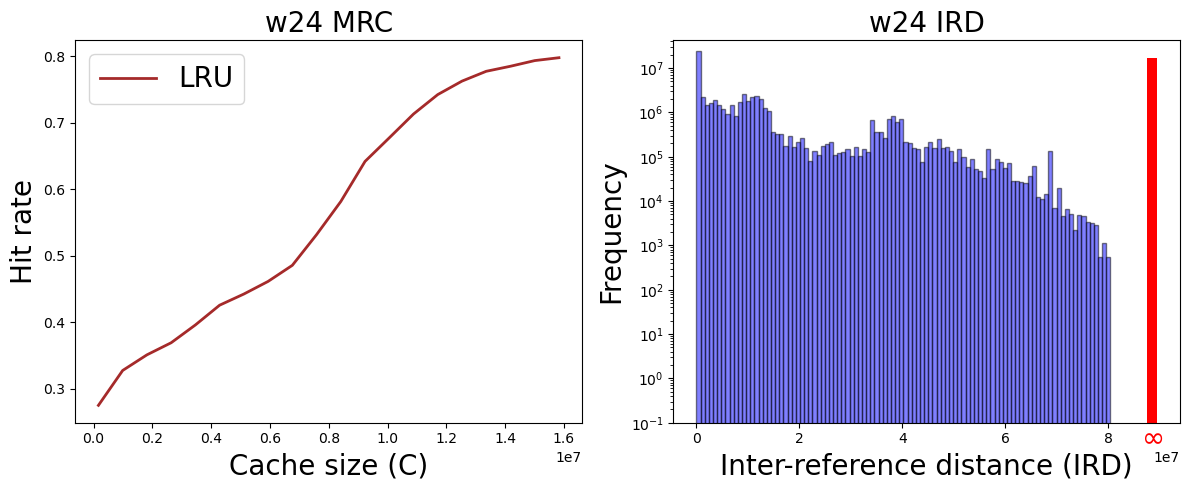

In [67]:
mrc_ird_plot('w24', c, hr_lru, irds, -0.5)

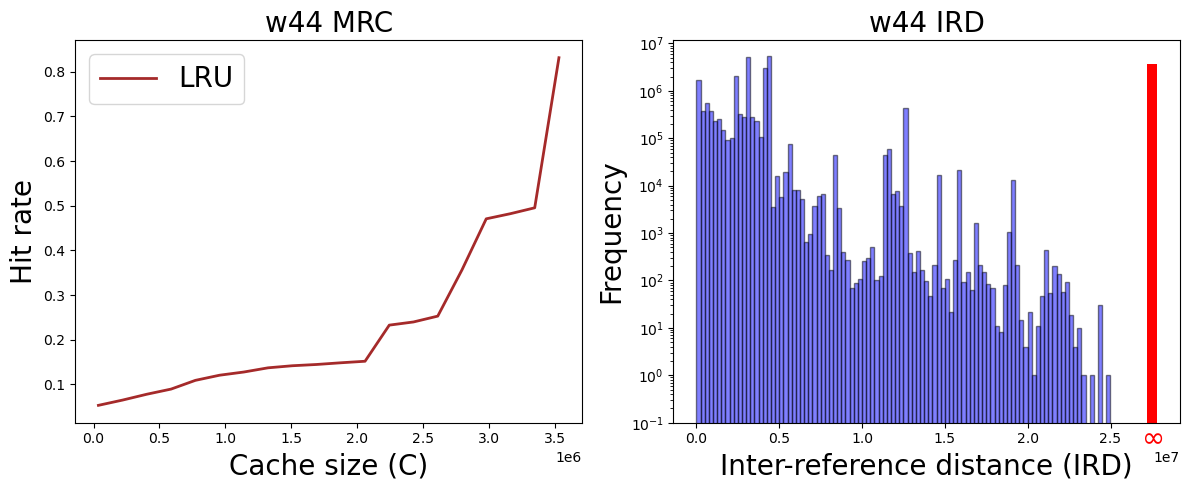

In [69]:
w44 = np.loadtxt('/opt/traces/w44_r.txt', dtype=np.int32)
w44[:, 0] += 7
w44 = tg.squash(tg.unroll(w44 // 8))
c, hr_lru, irds = mrc_ird_compute('w44', w44)
mrc_ird_plot('w44', c, hr_lru, irds, -0.5)

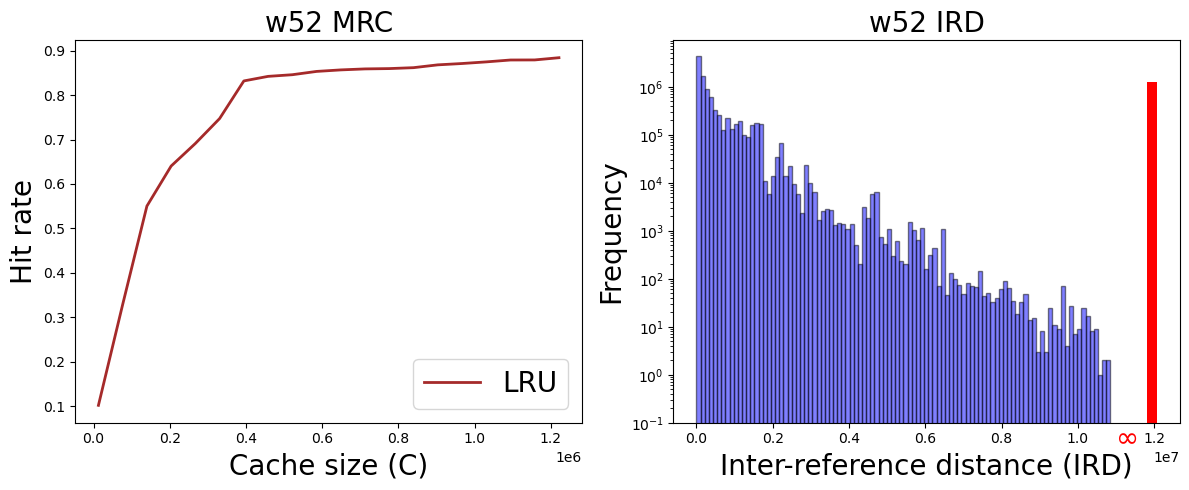

In [73]:
w52 = np.loadtxt('/opt/traces/w52_r.txt', dtype=np.int32)
w52[:, 0] += 7
w52 = tg.squash(tg.unroll(w52 // 8))
c, hr_lru, irds = mrc_ird_compute('w52', w52)


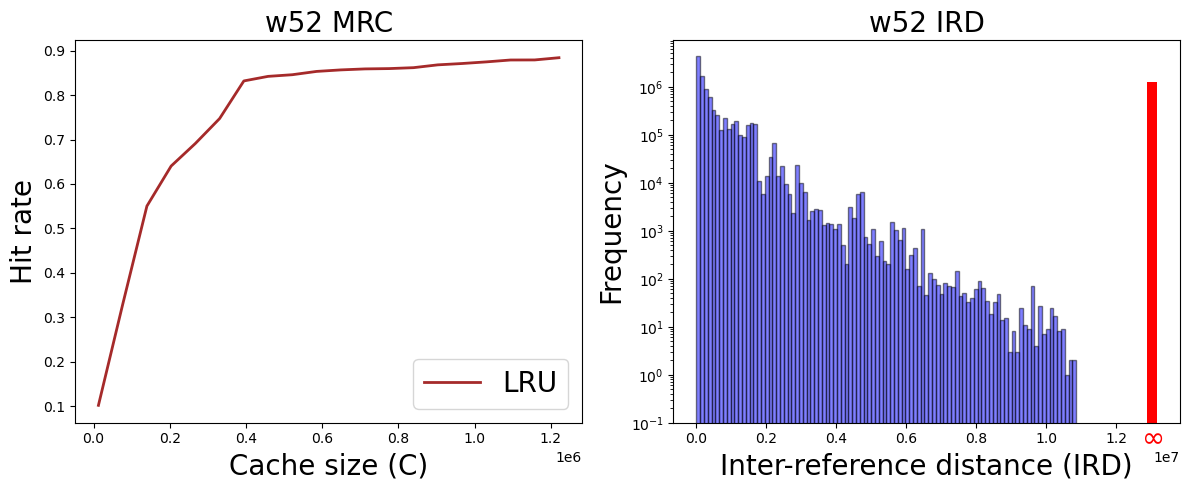

In [75]:
mrc_ird_plot('w52', c, hr_lru, irds, -0.5)

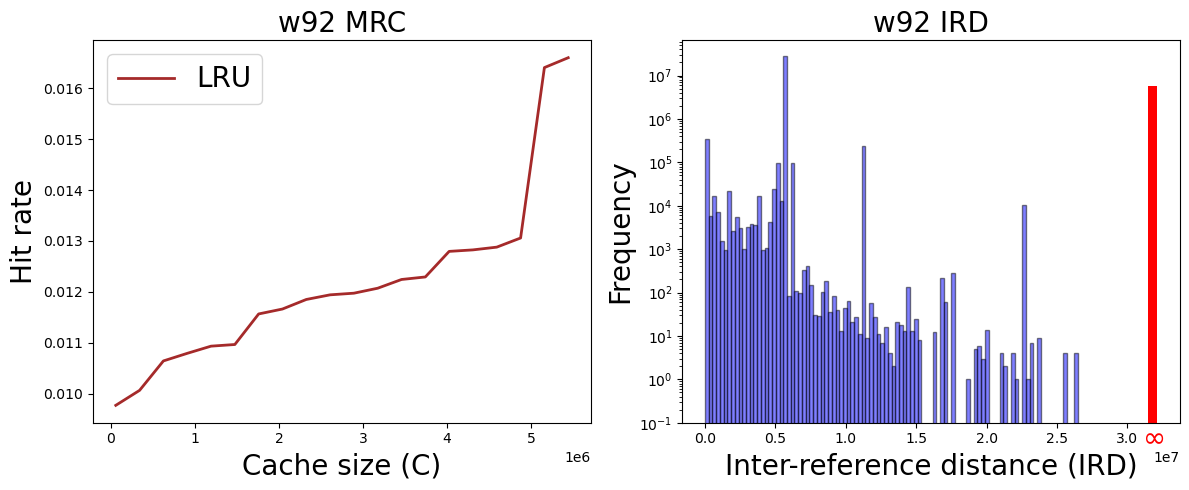

In [76]:
w92 = np.loadtxt('/opt/traces/w92_r.txt', dtype=np.int32)
w92[:, 0] += 7
w92 = tg.squash(tg.unroll(w92 // 8))
c, hr_lru, irds = mrc_ird_compute('w92', w92)


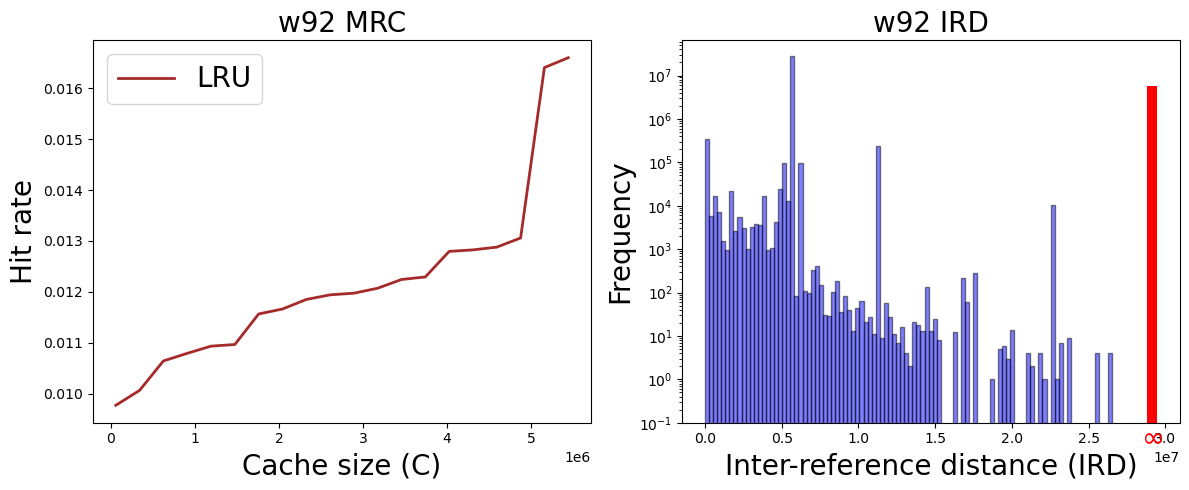

In [78]:
mrc_ird_plot('w92', c, hr_lru, irds, -0.5)

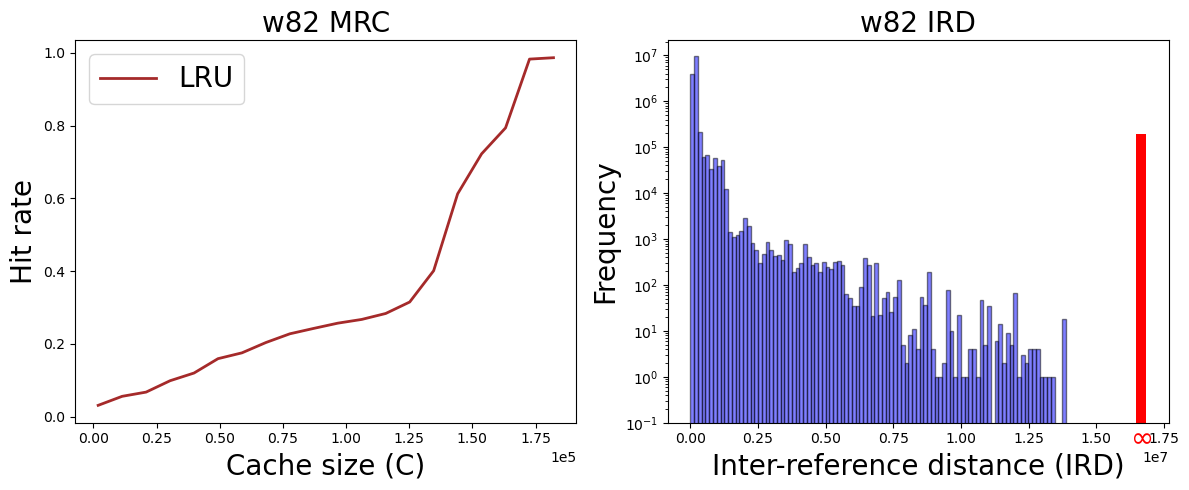

In [81]:
w82 = np.loadtxt('/opt/traces/w82_r.txt', dtype=np.int32)
w82[:, 0] += 7
w82 = tg.squash(tg.unroll(w82 // 8))
c, hr_lru, irds = mrc_ird_compute('w82', w82)


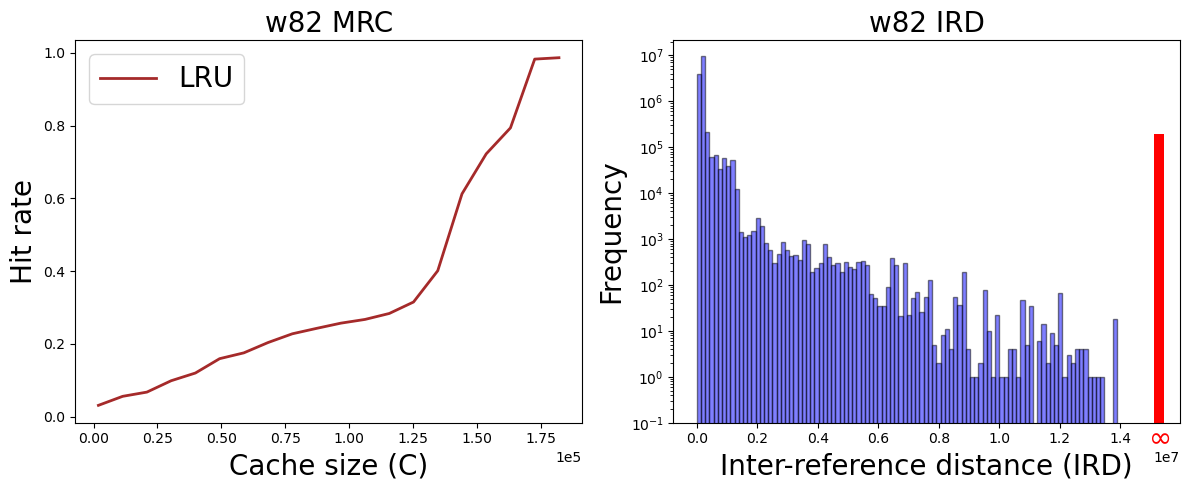

In [91]:
mrc_ird_plot('w82', c, hr_lru, irds, -0.5)

/tmp/ipykernel_21511/2292370410.py:1: DeprecationWarning: loadtxt(): Parsing an integer via a float is deprecated.  To avoid this warning, you can:
    * make sure the original data is stored as integers.
    * use the `converters=` keyword argument.  If you only use
      NumPy 1.23 or later, `converters=float` will normally work.
    * Use `np.loadtxt(...).astype(np.int64)` parsing the file as
      floating point and then convert it.  (On all NumPy versions.)
  (Deprecated NumPy 1.23)
  v28 = np.loadtxt('/mnt/sda/alibaba_block_traces_2020/volume28.txt', dtype=np.int32)


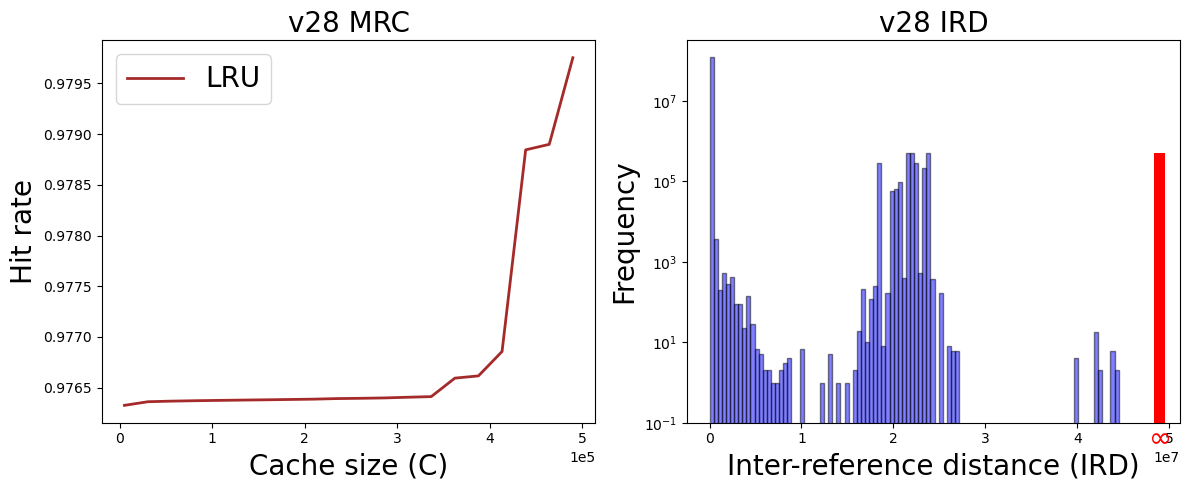

In [92]:
v28 = np.loadtxt('/mnt/sda/alibaba_block_traces_2020/volume28.txt', dtype=np.int32)
v28[:, 0] += 4095
v28 = tg.squash(tg.unroll(v28 // 4096))
c, hr_lru, irds = mrc_ird_compute('v28', v28)


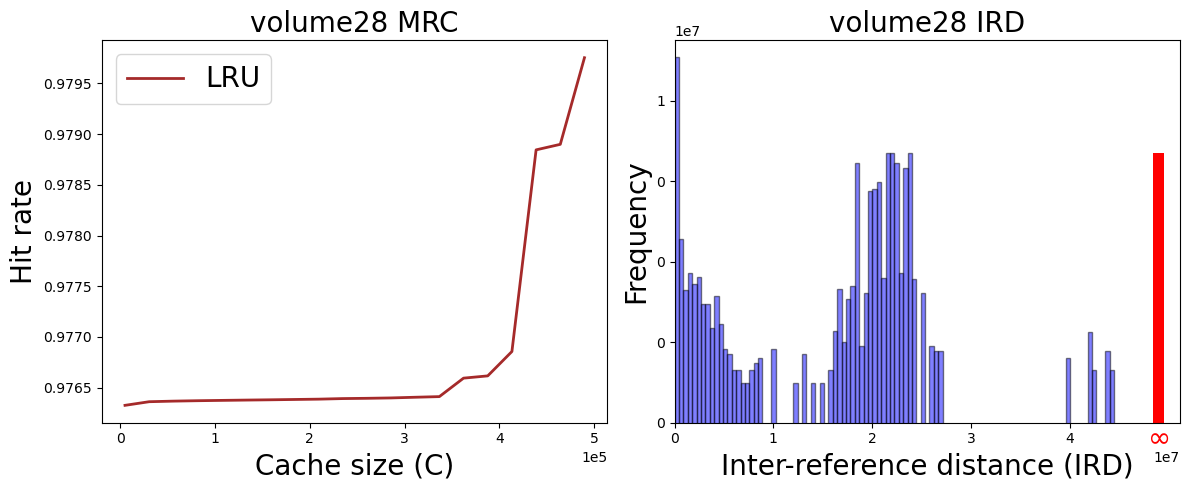

In [116]:
mrc_ird_plot('volume28', c, hr_lru, irds, -0.5)

In [105]:
v538 = np.loadtxt('/mnt/sda/alibaba_block_traces_2020/volume538.txt', dtype=np.int64)
v538[:, 0] += 4095
v538 = tg.squash(tg.unroll(v538 // 4096))
c538, hr_lru_538, irds_538 = mrc_ird_compute('v538', v538)

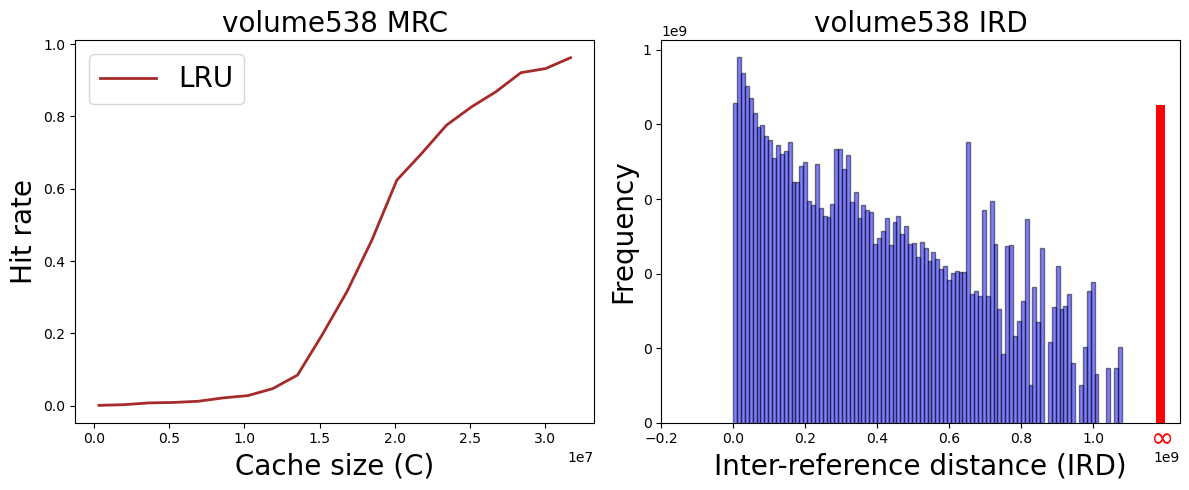

In [107]:
mrc_ird_plot('volume538', c538, hr_lru_538, irds_538, -0.5)

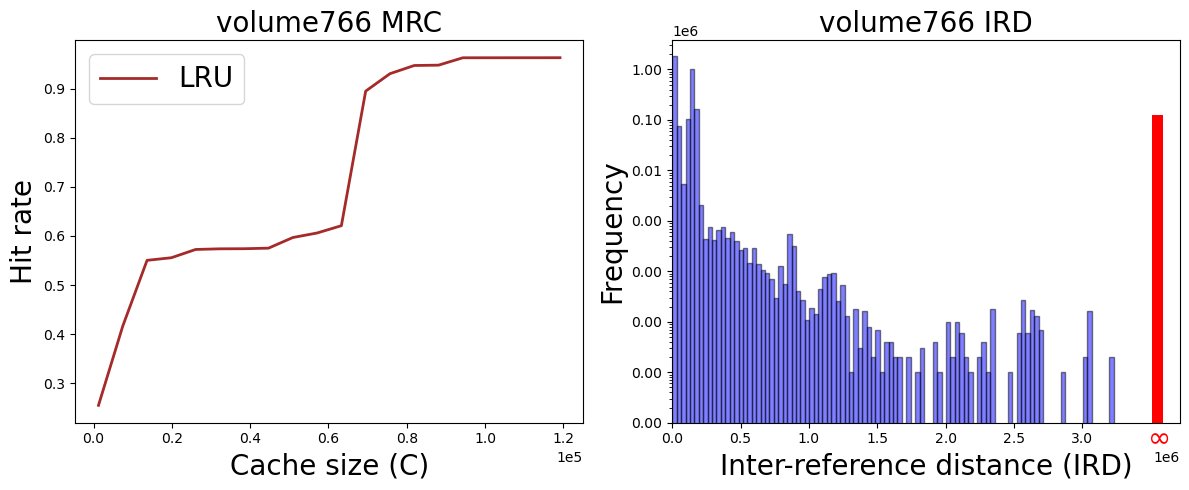

In [3]:
v766 = np.loadtxt('/mnt/sda/alibaba_block_traces_2020/volume766.txt', dtype=np.int64)
v766[:, 0] += 4095
v766 = tg.squash(tg.unroll(v766 // 4096))
c766, hr_lru_766, irds_766 = mrc_ird_compute('v766', v766)
mrc_ird_plot('volume766', c766, hr_lru_766, irds_766, -0.5)

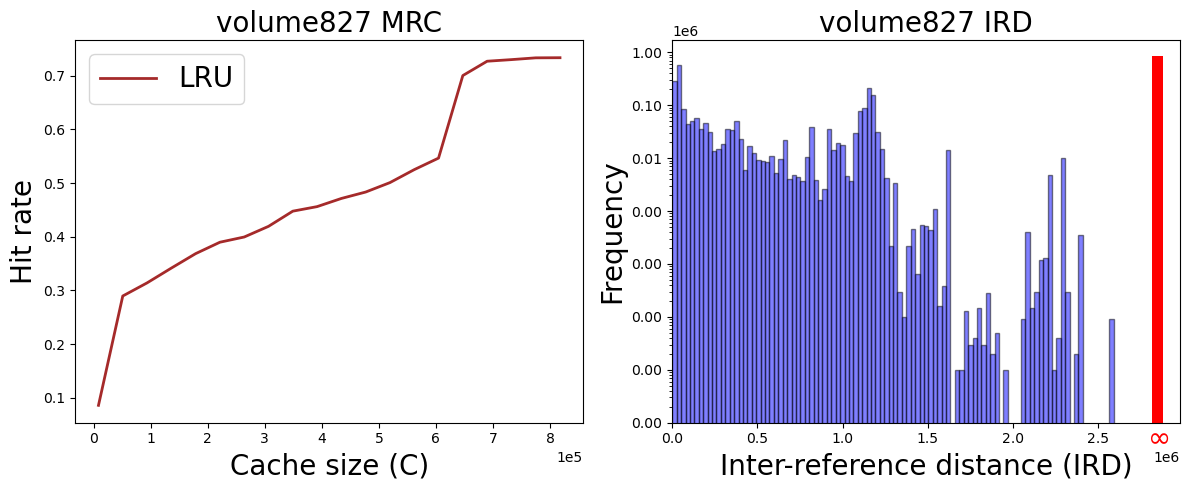

In [4]:
v827 = np.loadtxt('/mnt/sda/alibaba_block_traces_2020/volume827.txt', dtype=np.int64)
v827[:, 0] += 4095
v827 = tg.squash(tg.unroll(v827 // 4096))
c827, hr_lru_827, irds_827 = mrc_ird_compute('v827', v827)
mrc_ird_plot('volume827', c827, hr_lru_827, irds_827, -0.5)